<a href="https://colab.research.google.com/github/CmilAmaya/cryptography-algorithms/blob/main/AES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyaes

  Preparing metadata (setup.py) ... done
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26347 sha256=aa174f913c358a473ed25478b18e1864a5e55cb663f183d285b866c1de81fc18
  Stored in directory: /root/.cache/pip/wheels/d9/43/32/ec313dd557e88e419489b9df40c04dad7b99576bde162496f8
Successfully built pyaes


In [2]:
import base64
import pyaes
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import io
import os

KEY = "123456789012345678901234"  # AES-192

In [3]:
# Process image and file

def read_image(file_path):
    with open(file_path, "rb") as file:
        return file.read()

def image_to_bytes(image):
    return bytes(image)

def set_aes_environment(key):
    return pyaes.AESModeOfOperationECB(key.encode('utf-8'))

def validate_key(key):
    if len(key) not in (16, 24, 32):
        raise ValueError("Key must be 16, 24, or 32 bytes long for AES encryption.")
    return key

def encrypt_image(image_bytes):
    aes_env = set_aes_environment(KEY)
    padded_data = image_bytes + b'\x00' * (16 - len(image_bytes) % 16 if len(image_bytes) % 16 != 0 else 0)
    encrypted_bytes = b''

    for i in range(0, len(padded_data), 16):
        block = padded_data[i:i+16]
        encrypted_block = aes_env.encrypt(block)
        encrypted_bytes += encrypted_block

    return encrypted_bytes

def decrypt_image(encrypted_bytes):
    aes_env = set_aes_environment(KEY)
    decrypted_bytes = b''

    for i in range(0, len(encrypted_bytes), 16):
        block = encrypted_bytes[i:i+16]
        decrypted_block = aes_env.decrypt(block)
        decrypted_bytes += decrypted_block

    return decrypted_bytes.rstrip(b'\x00')

In [4]:
# Bytes - Base64

def bytes_to_base64(image_bytes):
    return base64.b64encode(image_bytes)

def base64_to_bytes(encoded_bytes):
    return base64.b64decode(encoded_bytes)

def save_bytes_to_file(data, path):
    os.makedirs(os.path.dirname(path), exist_ok=True)
    with open(path, "wb") as f:
        f.write(data)

In [5]:
## Show image
def show_image_from_bytes(image_bytes, title="Image"):
    image = Image.open(io.BytesIO(image_bytes))
    plt.imshow(image)
    plt.title(title)
    plt.axis("off")
    plt.show()

def show_encrypted_visual(encrypted_bytes):
    arr = np.frombuffer(encrypted_bytes[:65536], dtype=np.uint8)  # toma una parte
    size = int(np.sqrt(len(arr)))
    arr = arr[:size*size].reshape((size, size))
    plt.imshow(arr, cmap='gray')
    plt.title("Encrypted Image")
    plt.axis("off")
    plt.show()

In [6]:
def main():
    input_path = input("📁 Enter the path of the image to encrypt: ").strip()
    encrypted_path = "encryptedImages/encrypted.txt"
    decrypted_path = "decryptedImages/decrypted.jpg"

    validate_key(KEY)
    image_bytes = read_image(input_path)
    print("\n ➡️ Original Image")
    show_image_from_bytes(image_bytes, "Original Image")
    encrypted_bytes = encrypt_image(image_bytes)
    encoded_bytes = bytes_to_base64(encrypted_bytes)
    save_bytes_to_file(encoded_bytes, encrypted_path)

    print("\n ➡️ Encrypted Image")
    show_encrypted_visual(encrypted_bytes)

    print("Base64:")
    print(encoded_bytes[:200], "...")

    decrypted_bytes = decrypt_image(base64_to_bytes(encoded_bytes))
    save_bytes_to_file(decrypted_bytes, decrypted_path)

    print("\n ➡️ Decrypted Image")
    show_image_from_bytes(decrypted_bytes, "Decrypted Image")

    print(f"\n ➡️ Original: {input_path}")
    print(f"\n ➡️ Encrypted: {encrypted_path}")
    print(f"\n ➡️ Decrypted: {decrypted_path}")

📁 Enter the path of the image to encrypt: /content/vacas - bc.jpg

 ➡️ Original Image


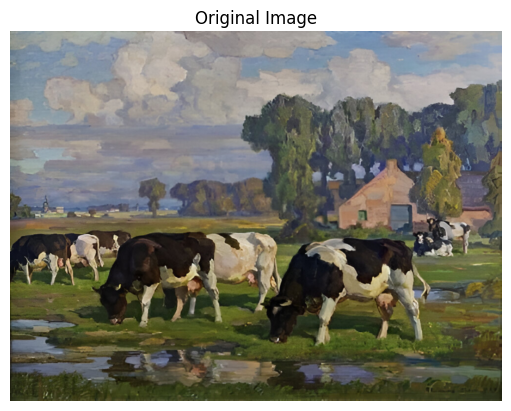


 ➡️ Encrypted Image


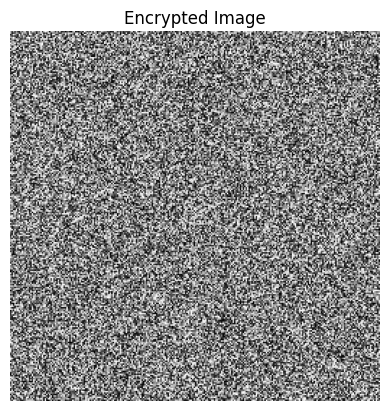

Base64:
b'ujipP5I1JKxmtuJIUutn3r6OQ5F1/j3I9t2zDMvHqj6vR+YrLVIHUGMaA5LkCS0WYHwZ/KlDdTatRPOuGWd41J6BhkFSGyc09bhDkD55L2NISjuW5iNt/mEcdcK+vvCfKI1c4w+nn5k2wFYcBW80rimxDildnRH2voUZU9h61JdISjuW5iNt/mEcdcK+vvCfSEo7luYj' ...

 ➡️ Decrypted Image


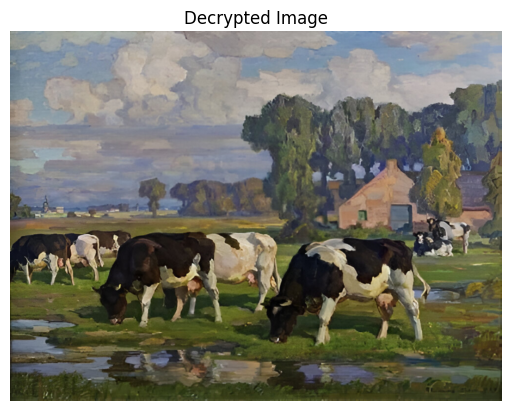


 ➡️ Original: /content/vacas - bc.jpg

 ➡️ Encrypted: encryptedImages/encrypted.txt

 ➡️ Decrypted: decryptedImages/decrypted.jpg


In [7]:
main()